In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [2]:
data = datasets.load_iris()
# print(data.target)
X = data.data[data.target != 0]
#X = normalize(data.data[data.target != 0])
y = data.target[data.target != 0]
y[y == 1] = 0
y[y == 2] = 1

In [3]:
X.shape
y.shape

(100,)

In [4]:
num_training = X.shape[0]
num_features = X.shape[1]

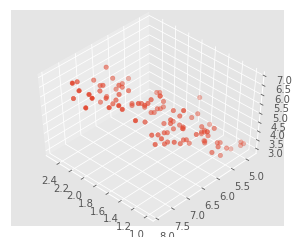

In [5]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2])

In [6]:
mask = np.random.choice(num_training, num_training)
X_train, X_test = X[mask][20:],X[mask][:20]
y_train, y_test = y[mask][20:],y[mask][:20]
y_train.shape

(80,)

In [7]:
y_train

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [8]:
class LogitClassifier:
    def __init__(self, lr, n_iter, beta=None, verbose=False):
        self.lr = lr
        self.n_iter = n_iter
        if beta:
            self.beta = beta
        else:
            self.beta = None
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def loss(self, y, h):
        return (-y * np.log(h) + (1-y) * np.log(1-h)).mean()
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, X, y):
        X = self.add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        
        if self.beta:
            velocity = np.zeros(X.shape[1])
            grad = np.zeros(X.shape[1])
            
        for i in range(self.n_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            grad = np.dot(X.T, (h - y)) / y.size
            if self.beta:
                velocity = self.beta * velocity + (1-self.beta) * grad      
                self.theta -= self.lr * velocity
            else:
                self.theta -= self.lr * grad
            if self.verbose and i % 10000 == 0:
                print('loss: {}'.format(self.loss(y,h)))
            
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [9]:
def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
model = LogitClassifier(lr=0.1, n_iter=300000, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("LogitClassifier Accuracy:", accuracy)

loss: 0.051727401534324285
loss: -0.0030861529879820065
loss: -0.001810866576536463
loss: -0.0012984855219891837
loss: -0.001015558915520347
loss: -0.0008354580155695243
loss: -0.0007108279867943426
loss: -0.0006195982471123535
loss: -0.0005500257311968642
loss: -0.0004952751118214992
loss: -0.000451097683397047
loss: -0.00041471575185117145
loss: -0.00038423873727471764
loss: -0.00035833672389746807
loss: -0.00033604803579759745
loss: -0.0003166607726360585
loss: -0.0002996371677698838
loss: -0.000284563762478895
loss: -0.0002711176905065446
loss: -0.00025904332112394187
loss: -0.00024813573900381015
loss: nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
LogitClassifier Accuracy: 0.9090909090909091


In [149]:
model = LogitClassifier(lr=0.1, n_iter=300000, beta=0.9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test, 0.5)
accuracy = accuracy_score(y_test, y_pred)
print("LogitClassifier Accuracy:", accuracy)

LogitClassifier Accuracy: 0.9090909090909091


In [113]:
model = LogisticRegression(C=1e20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Sklearn Accuracy:", accuracy)

Sklearn Accuracy: 0.85
